In [1]:
import astropy
from astropy.io import fits
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
%matplotlib inline

In [2]:
def mad(data, axis=None):
    return mean(absolute(data - mean(data, axis)), axis)

In [3]:
#v44cat_n = fits.open('/Users/rsimons/Desktop/clear/Catalogs/goodsn_3dhst_test_v4.4.zout.fits')
v44cat_n = fits.open('/Users/rsimons/Desktop/clear/Catalogs/goodsn_t_3dhst.v4.4.zout.fits')
v41cat_n = fits.open('/Users/rsimons/Desktop/clear/Catalogs/goodsn_3dhst.v4.1.zout.FITS')

#v44cat_s = fits.open('/Users/rsimons/Desktop/clear/Catalogs/goodss_3dhst_test_v4.4.zout.fits')
v44cat_s = fits.open('/Users/rsimons/Desktop/clear/Catalogs/goodss_t_3dhst.v4.4.zout.fits')
v41cat_s = fits.open('/Users/rsimons/Dropbox/v44cats/goodss_3dhst.v4.1.zout.FITS')








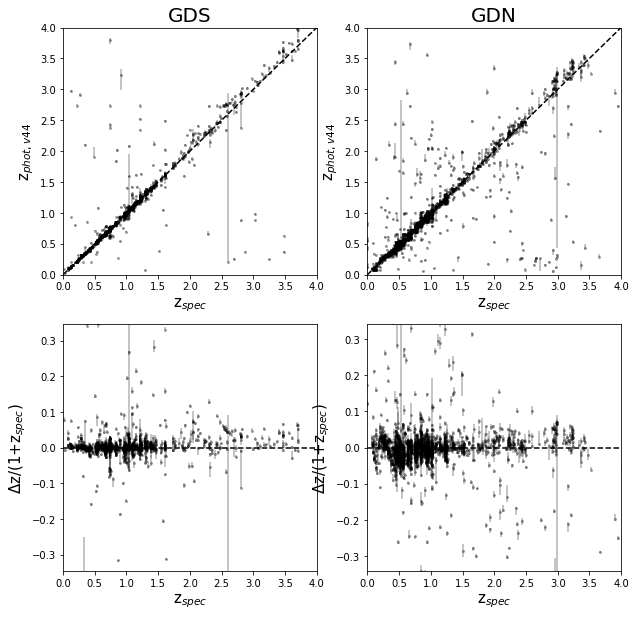

In [4]:
gd_s = where(v44cat_s[1].data['z_spec'] > 0.)
gd_n = where(v44cat_n[1].data['z_spec'] > 0.)

fig, axes = plt.subplots(2,2, figsize = (10, 10))

zs_s = v44cat_s[1].data['z_spec'][gd_s]
zs_n = v44cat_n[1].data['z_spec'][gd_n]

zp_s = v44cat_s[1].data['z_phot'][gd_s]
zp_n = v44cat_n[1].data['z_phot'][gd_n]

zup_s = abs(v44cat_s[1].data['z840'][gd_s] - zp_s)
zup_n = abs(v44cat_n[1].data['z840'][gd_n] - zp_n)

zlp_s = abs(v44cat_s[1].data['z160'][gd_s] - zp_s)
zlp_n = abs(v44cat_n[1].data['z160'][gd_n] - zp_n)



axes[0,0].errorbar(zs_s, zp_s, yerr = [zlp_s, zup_s], fmt = 'o', ms = 2, alpha = 0.3,color = 'black', linestyle = None)
axes[0,1].errorbar(zs_n, zp_n, yerr = [zlp_n, zup_n], fmt = 'o', ms = 2, alpha = 0.3,color = 'black', linestyle = None)




st_s = np.std((zp_s - zs_s)/(1+zs_s))

axes[1,0].errorbar(zs_s, (zp_s - zs_s)/(1+zs_s), yerr = [zlp_s/(1+zs_s), zup_s/(1+zs_s)], fmt = 'o', ms = 2, alpha = 0.3,color = 'black', linestyle = None)
axes[1,0].set_ylim(-2*st_s, 2*st_s)
axes[1,0].axhline(y = 0.0, linestyle = 'dashed', color = 'black')


st_n = np.std((zp_n - zs_n)/(1+zs_n))

axes[1,1].errorbar(zs_n, (zp_n - zs_n)/(1+zs_n), yerr = [zlp_n/(1+zs_n), zup_n/(1+zs_n)], fmt = 'o', ms = 2, alpha = 0.3,color = 'black', linestyle = None)
axes[1,1].set_ylim(-2*st_n, 2*st_n)
axes[1,1].axhline(y = 0.0, linestyle = 'dashed', color = 'black')





for ax in axes[0]:
    ax.set_xlabel(r'z$_{spec}$', fontsize = 15)
    ax.set_ylabel(r'z$_{phot, v44}$', fontsize = 15)
    ax.set_xlim(0,4)
    ax.set_ylim(0,4)
    ax.plot([0,4],[0,4], 'k--')

for ax in axes[1]:
    ax.set_xlabel(r'z$_{spec}$', fontsize = 15)
    ax.set_ylabel(r'$\Delta$z/(1+z$_{spec}$)', fontsize = 15)
    ax.set_xlim(0,4)


#for ax in axes[:,0]:
#    ax.clear()
    
    
axes[0,0].set_title('GDS', fontsize = 20)
axes[0,1].set_title('GDN', fontsize = 20)
    

fig.savefig('zpsec_zpot_v44.png', dpi = 300)


TypeError: 'NoneType' object is not subscriptable

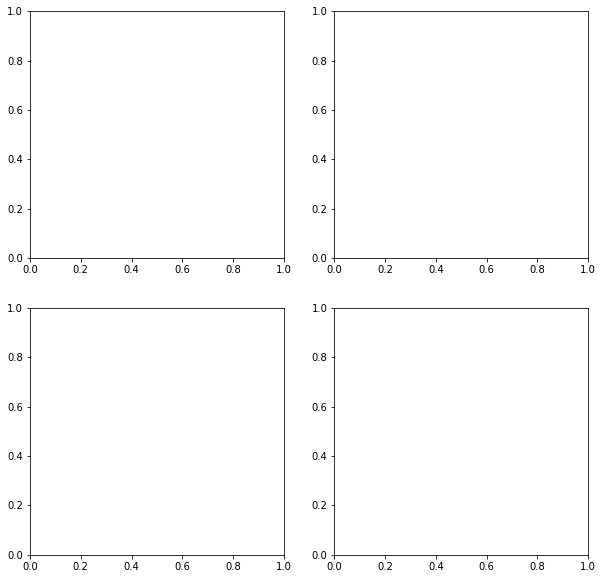

In [5]:
fig, axes = plt.subplots(2,2, figsize = (10, 10))

if False:
    zp_s_v44 = v44cat_s[1].data['z_phot']
    zup_s_v44 = abs(v44cat_s[1].data['z840'] - zp_s_v44)
    zlp_s_v44 = abs(v44cat_s[1].data['z160'] - zp_s_v44)

    zp_n_v44 = v44cat_n[1].data['z_phot']
    zup_n_v44 = abs(v44cat_n[1].data['z840'] - zp_n_v44)
    zlp_n_v44 = abs(v44cat_n[1].data['z160'] - zp_n_v44)


else:
    zp_s_v44 = v44cat_s[0].data[:,2]
    zup_s_v44 = abs(v44cat_s[0].data[:,3] - zp_s_v44)
    zlp_s_v44 = abs(v44cat_s[0].data[:,1] - zp_s_v44)
    zp_n_v44 = v44cat_n[0].data[:,2]
    zup_n_v44 = abs(v44cat_n[0].data[:,3] - zp_n_v44)
    zlp_n_v44 = abs(v44cat_n[0].data[:,1] - zp_n_v44)

zp_s_v41 = v41cat_s[1].data['z_p']
zp_n_v41 = v41cat_n[1].data['z_p']
zup_s_v41 = abs(v41cat_s[1].data['u68'] - zp_s_v41)
zup_n_v41 = abs(v41cat_n[1].data['u68'] - zp_n_v41)
zlp_s_v41 = abs(v41cat_s[1].data['l68'] - zp_s_v41)
zlp_n_v41 = abs(v41cat_n[1].data['l68'] - zp_n_v41)


#44 versus 41, goods-s
axes[0,0].errorbar(zp_s_v41, zp_s_v44,fmt = 'o', ms = 0.8, alpha = 0.05,color = 'black', linestyle = None)
# xerr = [zlp_s_v41, zup_s_v41], yerr = [zlp_s_v44, zup_s_v44], 
#44 versus 41, goods-n
axes[0,1].errorbar(zp_n_v41, zp_n_v44, fmt = 'o', ms = 0.8, alpha = 0.05,color = 'black', linestyle = None)
# xerr = [zlp_n_v41, zup_n_v41], 
#yerr = [zlp_n_v44, zup_n_v44],

gd = where(isfinite(zp_s_v44) & (zp_s_v44 > 0) & isfinite(zp_s_v41) & (zp_s_v41 > 0) & (zlp_s_v41 < 1) & (zlp_s_v41 < 1) & (zup_s_v44 < 1) & (zup_s_v44 < 1))

st_s = np.std((zp_s_v44[gd] - zp_s_v41[gd])/(1+zp_s_v44[gd]))

ye_l = sqrt(zlp_s_v41**2. + zlp_s_v44**2.)/(1+zp_s_v44)
ye_u = sqrt(zup_s_v41**2. + zup_s_v44**2.)/(1+zp_s_v44)

ye_l = 0.
ye_u = 0.

axes[1,0].errorbar(zp_s_v41[gd], (zp_s_v44[gd] - zp_s_v41[gd])/(1+zp_s_v41[gd]), fmt = 'o', ms = 0.8, alpha = 0.05,color = 'black', linestyle = None)
axes[1,0].set_ylim(-2*st_s, 2*st_s)
axes[1,0].axhline(y = 0.0, linestyle = 'dashed', color = 'black')
# yerr = [ye_l[gd], ye_u[gd]],


gd = where(isfinite(zp_n_v44) & (zp_n_v44 > 0) & isfinite(zp_n_v41) & (zp_n_v41 > 0) & (zlp_n_v41 < 1) & (zup_n_v41 < 1) & (zlp_n_v44 < 1) & (zup_n_v44 < 1))
st_n = np.std((zp_n_v44[gd] - zp_n_v41[gd])/(1+zp_n_v44[gd]))

ye_l = sqrt(zlp_n_v41**2. + zlp_n_v44**2.)/(1+zp_n_v44)
ye_u = sqrt(zup_n_v41**2. + zup_n_v44**2.)/(1+zp_n_v44)




ye_l = 0.
ye_u = 0.

# yerr = [ye_l[gd], ye_u[gd]],
axes[1,1].errorbar(zp_n_v41[gd], (zp_n_v44[gd] - zp_n_v41[gd])/(1+zp_n_v41[gd]), fmt = 'o', ms =  0.8, alpha = 0.05,color = 'black', linestyle = None)
axes[1,1].set_ylim(-2*st_n, 2*st_n)
axes[1,1].axhline(y = 0.0, linestyle = 'dashed', color = 'black')






for ax in axes[0]:
    ax.set_xlabel(r'z$_{phot, v41}$', fontsize = 15)
    ax.set_ylabel(r'z$_{phot, v44}$', fontsize = 15)
    ax.set_xlim(0,4)
    ax.set_ylim(0,4)
    ax.plot([0,4],[0,4], 'k--')

for ax in axes[1]:
    ax.set_xlabel(r'z$_{phot, v41}$', fontsize = 15)
    ax.set_ylabel(r'$\Delta$z/(1+z$_{phot, v41}$)', fontsize = 15, labelpad = -2)
    ax.set_xlim(0,4)

#for ax in axes[:,1]:
#    ax.clear()
    
    
    
axes[0,0].set_title('GDS', fontsize = 20)
axes[0,1].set_title('GDN', fontsize = 20)
    

fig.savefig('zphotv41_zphotv44nzp.png', dpi = 300)


In [ ]:
gd_s = where(v41cat_s[1].data['z_spec'] > 0.)
gd_n = where(v41cat_n[1].data['z_spec'] > 0.)

fig, axes = plt.subplots(2,2, figsize = (10, 10))

zs_s = v41cat_s[1].data['z_spec'][gd_s]
zs_n = v41cat_n[1].data['z_spec'][gd_n]
zp_s = v41cat_s[1].data['z_p'][gd_s]
zp_n = v41cat_n[1].data['z_p'][gd_n]

zup_s = abs(v41cat_s[1].data['u68'][gd_s] - zp_s)
zup_n = abs(v41cat_n[1].data['u68'][gd_n] - zp_n)
zlp_s = abs(v41cat_s[1].data['l68'][gd_s] - zp_s)
zlp_n = abs(v41cat_n[1].data['l68'][gd_n] - zp_n)



axes[0,0].errorbar(zs_s, zp_s, yerr = [zlp_s, zup_s], fmt = 'o', ms = 2, alpha = 0.3,color = 'black', linestyle = None)
axes[0,1].errorbar(zs_n, zp_n, yerr = [zlp_n, zup_n], fmt = 'o', ms = 2, alpha = 0.3,color = 'black', linestyle = None)




st_s = np.std((zp_s - zs_s)/(1+zs_s))

axes[1,0].errorbar(zs_s, (zp_s - zs_s)/(1+zs_s), yerr = [zlp_s/(1+zs_s), zup_s/(1+zs_s)], fmt = 'o', ms = 2, alpha = 0.3,color = 'black', linestyle = None)
axes[1,0].set_ylim(-2*st_s, 2*st_s)
axes[1,0].axhline(y = 0.0, linestyle = 'dashed', color = 'black')


st_n = np.std((zp_n - zs_n)/(1+zs_n))

axes[1,1].errorbar(zs_n, (zp_n - zs_n)/(1+zs_n), yerr = [zlp_n/(1+zs_n), zup_n/(1+zs_n)], fmt = 'o', ms = 2, alpha = 0.3,color = 'black', linestyle = None)
axes[1,1].set_ylim(-2*st_n, 2*st_n)
axes[1,1].axhline(y = 0.0, linestyle = 'dashed', color = 'black')





for ax in axes[0]:
    ax.set_xlabel(r'z$_{spec}$', fontsize = 15)
    ax.set_ylabel(r'z$_{phot, v41}$', fontsize = 15)
    ax.set_xlim(0,4)
    ax.set_ylim(0,4)
    ax.plot([0,4],[0,4], 'k--')

for ax in axes[1]:
    ax.set_xlabel(r'z$_{spec}$', fontsize = 15)
    ax.set_ylabel(r'$\Delta$z/(1+z$_{spec}$)', fontsize = 15)
    ax.set_xlim(0,4)

    
    
    
axes[0,0].set_title('GDS', fontsize = 20)
axes[0,1].set_title('GDN', fontsize = 20)
    

fig.savefig('zpsec_zpot_v41.png', dpi = 300)


In [ ]:
v44cat_s[1].data['z500']

In [ ]:
ye_l[gd].max()

In [ ]:
v44cat_s[0].data[1]